<font color="#de3023"><h1><b>REMINDER MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

 # Module 4/Bonus

# *Online Dermatologists:* 📱 🌐 Diagnosing Skin Cancer through a Web Application 

In this project, we will be be diagnosing skin lesion images for signs of skin cancer. To perform this task, we'll be working with an array of machine learning methods and models.

In previous notebooks, we've created ML models to perform skin cancer image classification and deployed our models to web apps. Now, what are some ways we could improve our classification performance? Perhaps we could visualize our dataset to better understand some trends within it? Could we also explore alternative methods of performing classification, in addition to just CNNs and traditional Ml models? What if we could segment out the skin cancer lesion, to prevent our ML classification models from being tripped up by elements of the background?

In this notebook we'll be:
*   Visualizing our data with dimensionality reduction techniques
*   Detecting Computer Vision features and using them for classification
*   Performing Lesion Segmentation with ML processes

# Set up our Environment

In [1]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }
!pip install -U opencv-contrib-python
import cv2

from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

!pip install hypopt
from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

!pip install tensorflowjs 
import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile

# Prepare data

images_1 = os.makedirs('images_1', exist_ok=True)
images_2= os.makedirs('images_2', exist_ok=True)
images_all= os.makedirs('images_all', exist_ok=True)

metadata_path = 'metadata.csv'
image_path_1 = 'images_1.zip'
image_path_2 = 'images_2.zip'
images_rgb_path = 'hmnist_8_8_RGB.csv'

!wget -O metadata.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/metadata.csv'
!wget -O images_1.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/images_1.zip'
!wget -O images_2.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/images_2.zip'
!wget -O hmnist_8_8_RGB.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/hmnist_8_8_RGB.csv'
!unzip -q -o images_1.zip -d images_1 
!unzip -q -o images_2.zip -d images_2 

!pip install patool
import patoolib

import os.path
from os import path

from distutils.dir_util import copy_tree

fromDirectory = 'images_1'
toDirectory = 'images_all'

copy_tree(fromDirectory, toDirectory)

fromDirectory = 'images_2'
toDirectory = 'images_all'

copy_tree(fromDirectory, toDirectory)

os.makedirs("static/js")
!wget -O static/js/skin_cancer_diagnosis_script.js 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/skin_cancer_diagnosis_script.js'
output = 'static/js/skin_cancer_diagnosis_script.js'

print("Downloaded Data")

     |████████████████████████████████| 66.5 MB 7.7 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 64 kB 2.4 MB/s 
--2021-11-07 17:13:07--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/metadata.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.166.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553377 (540K) [text/csv]
Saving to: ‘metadata.csv’

metadata.csv        100%[===================>] 540.41K  --.-KB/s    in 0.008s  

2021-11-07 17:13:07 (67.7 MB/s) - ‘metadata.csv’ saved [553377

In [ ]:
#@title If the previous cell doesn't run, run this cell instead! { display-mode: "form" }
!pip install -U opencv-contrib-python
import cv2

from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

!pip install hypopt
from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

!pip install tensorflowjs 
import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile

# Prepare data

DATA_ROOT = '/content/data'
os.makedirs(DATA_ROOT, exist_ok=True)

metadata_url = 'https://drive.google.com/uc?id=1kmpa-Lnra-8KhEjj8r3nj9y4e53qcPGX'
metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
requests.get(metadata_url)
gdown.download(metadata_url, metadata_path, True)

images_1 = 'https://drive.google.com/uc?id=1HW5HbQ_OR7xUPWfw4yg1r_EbhDaCuOrj'
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
requests.get(images_1)
gdown.download(images_1, image_path_1, True)

images_2 = 'https://drive.google.com/uc?id=1VAbEVMKZmKyh9tpe9iVZ_XpTPLpxitwt'
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
requests.get(images_2)
gdown.download(images_2, image_path_2, True)

metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
images_rgb_path = os.path.join(DATA_ROOT, 'hmnist_8_8_RGB.csv')

!pip install patool
import patoolib

import os.path
from os import path

if path.exists(os.path.join(DATA_ROOT, 'images_1')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_1.zip'), outdir= os.path.join(DATA_ROOT, 'images_1') )

if path.exists(os.path.join(DATA_ROOT, 'images_2')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_2.zip'), outdir= os.path.join(DATA_ROOT, 'images_2') )

from distutils.dir_util import copy_tree

fromDirectory = os.path.join(DATA_ROOT, 'images_1')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

fromDirectory = os.path.join(DATA_ROOT, 'images_2')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

print("Downloaded Data")

In [3]:
IMG_WIDTH = 100
IMG_HEIGHT = 75

In [4]:
#@title Run this to initialize our X, X_g, and y variables { display-mode: "form" }
metadata = pd.read_csv(metadata_path)
metadata['category'] = metadata['dx'].replace({'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6,})

X = []
X_g = []
y = []

for i in tqdm(range(len(metadata))):
  image_meta = metadata.iloc[i]
  path = os.path.join(toDirectory, image_meta['image_id'] + '.jpg')
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
  
  img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  X_g.append(img_g)

  X.append(img)
  y.append(image_meta['category'])

X_g = np.array(X_g)
X = np.array(X)
y = np.array(y)

  0%|          | 0/10015 [00:00<?, ?it/s]

In [6]:
sample_cap = 142
option = 1

In [7]:
#@title Option 1: Run this to reduce dataset size. This method caps each class at *sample_cap* samples. { display-mode: "form" }
if (option == 1):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]
  iter_samples = [0,0,0,0,0,0,0]
  indicies = []

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  for i in range(len(X)):
    if iter_samples[y[i]] != sample_cap:
      indicies.append(i)
      iter_samples[y[i]] += 1

  X = X[indicies]
  X_g = X_g[indicies]

  y = y[indicies]

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)
else:
  print("This option was not selected")

Initial Class Samples
[327, 514, 1099, 115, 1113, 6705, 142]
Modified Class Samples
[142, 142, 142, 115, 142, 142, 142]


In [ ]:
#@title Option 2: Run this to reduce dataset size. This method only reduces the number of *nv* samples to be the same amount as the number of samples found in the second most prevalent class. { display-mode: "form" }
if (option == 2):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  largest_index = class_totals.index(max(class_totals))
  class_totals[largest_index] = 0

  second_largest_val = max(class_totals)

  indicies = []
  iter = 0
  for i in range(len(X)):
    if y[i] == largest_index:
      if iter != second_largest_val:
        indicies.append(i)
        iter += 1
      else:
        continue
    else:
      indicies.append(i)

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)

  X = X[indicies]
  X_g = X_g[indicies]

  y = y[indicies]
else:
  print("This option was not selected")

In [8]:
#@title Run this to Perform Data Augmentation { display-mode: "form" }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_g_train, X_g_test, y_train, y_test = train_test_split(X_g, y, test_size=0.4, random_state=101)

X_augmented = []
X_g_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
  transform = random.randint(0,1)
  if (transform == 0):
    # Flip the image across the y-axis
    X_augmented.append(cv2.flip(X_train[i],1))
    X_g_augmented.append(cv2.flip(X_g_train[i],1))
    y_augmented.append(y_train[i])
  else:
    # Zoom 33% into the image
    zoom = 0.33

    centerX,centerY=int(IMG_HEIGHT/2),int(IMG_WIDTH/2)
    radiusX,radiusY= int((1-zoom)*IMG_HEIGHT*2),int((1-zoom)*IMG_WIDTH*2)

    minX,maxX=centerX-radiusX,centerX+radiusX
    minY,maxY=centerY-radiusY,centerY+radiusY

    cropped = (X_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_augmented.append(new_img)

    cropped = (X_g_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_g_augmented.append(new_img)

    y_augmented.append(y_train[i])

X_augmented = np.array(X_augmented)
X_g_augmented = np.array(X_g_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_g_train = np.vstack((X_g_train,X_g_augmented))

y_train = np.append(y_train,y_augmented)

  0%|          | 0/580 [00:00<?, ?it/s]

Let's view the shape of our training variables after data augmentation.

# Visualizations with Dimensionality Reduction

Now that we've developed multiple ML models, let's explore some unsupervised learning methods for data visualizations. Why might we want to perform these data visualizations? What culd be hope to learn from this?


In [ ]:
# Your Response Here

The data for each of our images is very complicated. If you recall earlier, when we performed image flattening, each image was represented through a 7500 dimensional feature vector or a 7500 element 1D array. This type of data can be tricky to graph, since we can usually only graph points that have up to 3 dimensions in 3D space. To reduce the dimensionality of our dataset, we can use a method known as Principle Component Analysis, or PCA.


Specify which color you'd like to use to represent each class in this array!

In [9]:
colors = ['red','green','blue','purple','black','brown','orange']

In [10]:
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [11]:
X_flat = X.reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
X_g_flat = X_g.reshape(X_g.shape[0],X_g.shape[1]*X_g.shape[2])

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

Now that we've reduced the dimensionality of our dataset from a 30,000 dimensional feature vector to a 2 dimensional feature vector through PCA, we can plot our points on the scatterplot.

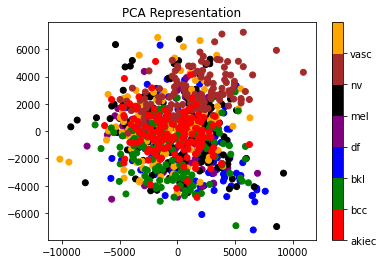

In [13]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(classes)
plt.title("PCA Representation")
plt.show()

Do you notice any interesting trends among our datapoints? Are different classes grouped up together?

In [ ]:
# Your Response Here

Let's convert this block of code into a function, so its easier to use later on.

In [14]:
def plot_visualization(X,y,colors,classes,name):
  plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
  cb = plt.colorbar()
  loc = np.arange(0,max(y),max(y)/float(len(colors)))
  cb.set_ticks(loc)
  cb.set_ticklabels(classes)
  plt.title(name)
  plt.show()

Now, how does PCA work? Simple put, PCA correlates every variable in your dataset against each other and then tries to remap your values to a reduced number of dimensions, while preserving as much variance (how far off numbers are spread) as possible. It's important to note that the new dimensions created (known as the principle components) often don't have much real world meaning associated with them.

Now that you've seen how PCA maps data and understand how it works a bit better, can you think of any cases in which PCA could perform poorly?

In [ ]:
# Your Response Here

Let's try out an alternative dimensionality reduction method known as t-SNE. Perhaps, this method will have better performance. Let's perform the same steps for our t-SNE Representation. 

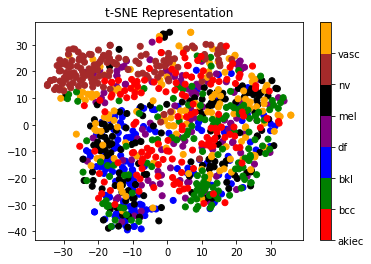

In [18]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_flat)
plot_visualization(X_tsne, y, colors, classes, "t-SNE Representation")

The mathematics behind how t-SNE works is much more complicated, but if you are interested in further information, you can check out [this](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) link. For now, as long as you know generally what these ML methods are doing, you should be fine to implement them in many applications.

However, in our case it seems that this visualization isn't the most helpful, as it is hard to discern a hard boundry between each class. Why might that be?

In [ ]:
# # Your Response Here

# Computer Vision Features for Classification

In a previous notebooks, we tried out several methods for classifying our skin cancer lesions. Let's try out another method. If this method has greater performance, our web app will be even better!

Before we start, can you think of any other methods of performing image classification? Any methods we haven't tried out already?

In [ ]:
# Your Response Here

In [19]:
lesion_img = X_g[0]

Images contain specific pixel configurations and characteristics that can be discerned through computer vision feature detectors. These features can be used for a variety of tasks, from identifiying if an image has been doctored, or to identify facial key points.

In our case, we'll can actually use these computer vision features as data to train classifiers! Essentially, we'll be respresenting images through the features that have been detected in it, and feeding the features into ML algorithms for training data.

![alt text](https://i.stack.imgur.com/bpaz6.png)

We'll specifically be using SIFT features. Scale-invariant feature transform, or SIFT, is a feature detection algorithm that identifies interesting features in an image. Unlike CNNs, which use convolutional layers to discern image features, SIFT detectors use gradients, or how an image's color changes in respect to direction. Just as a convolutional kernal calculates values for each pixel in an image, gradient calculators can do the same.

Given this information, how might SIFT features look like, when compared with CNN extracted features?

![alt text](https://www.codeproject.com/KB/recipes/619039/SIFT.JPG)

In [ ]:
# Your Response Here

Gradients are very useful for performing feature extraction, as areas of an image in which the color intensity abruptly changes, can indicate the possible presence of a key point. If you were presented with a satellitle image of an ocean with a boat, the boat would likely be detected with gradients, due to the change in color intensity between the boat and the ocean water. 

![alt text](
https://ak.picdn.net/shutterstock/videos/22004455/thumb/11.jpg)

In many cases, gradients can be used to perform edge detection. In the image of the building above, you can see that a lot of the features are detected at edges of the building. 

We can detect SIFT images in an image by using the following code. An interesting item to note is that the SIFT method has been patented, so we have to use the `opencv-contrib` library, as opposed to the regular `opencv` library to access the function.

In [20]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(lesion_img,None)

We can then display the keypoint with the following code.

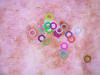

In [21]:
sift_img = cv2.drawKeypoints(X[0],keypoints,lesion_img)
cv2_imshow(sift_img)

There are two components to each SIFT feature, keypoints and descriptors. Keypoints are the location for the SIFT feature while descriptors contain more qualitative information regarding the feature.

In [22]:
print(descriptor.shape)
print(descriptor)

(26, 128)
[[ 1.  0.  0. ...  1.  1.  3.]
 [24. 57. 51. ... 27. 80. 35.]
 [10. 55. 40. ...  9. 40. 48.]
 ...
 [33. 13.  4. ...  4. 11. 58.]
 [ 5. 14. 19. ...  3.  0.  0.]
 [ 0.  0.  0. ... 57. 55. 49.]]


The number of SIFT features detected varies from image to image, but the descriptor shape remains the same, a 128 dimensional vector. 

Now, if we were to represent images through their descriptors, we could train traditional Sci-kit Learn models for classification.

Let's start building our classifier. We'll first need to detect all the SIFT features in our images and store them in a `all_descriptors`.

In [29]:
all_descriptors = []

for i in range(X_train.shape[0]):
  keypoints, descriptor = sift.detectAndCompute(X_train[i],None)
  if descriptor is not None:
    for d in descriptor:
      all_descriptors.append(d)

Looks like we've found a lot of features!

In [30]:
print(len(all_descriptors))

15757


Now that you've seen the SIFT features, how do you compare them with CNN extracted features?

In [ ]:
# Your Response Here

You might have noticed that each image that the SIFT feature detector operates on, has  adifferent number of image features detected. How might we transform this data into something that we could feed a Sci-kit Learn classifier?

In [ ]:
# Your Response Here

How would we do this? Well, we'll actually implement a technique from NLP here! Just as we used vectors of words to represent sentences in the bag of words method, now, we'll use descriptors (visual words) to represent our images (sentences). Just as we had to with NLP, we'll define a vocabulary size.

How might we go about choosing our vocabulary size?

In [ ]:
# Your Response Here

In this case, we'll make it 10 times the number of classes in our dataset. Once we've detected all the SIFT features in all of our images, we can perform K means clustering and transform the shape of our data. K means clustering is a method of generating labels for data points based on their similarities to other data points. Why might we use K Means clustering for the Bag of Words method?

In [ ]:
# Your Response Here

Let's get started?

In [32]:
k = len(classes)*10

sift_kmeans = KMeans(n_clusters=k)
sift_kmeans.fit(all_descriptors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=70, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Performing K Means computations for our training dataset.

In [33]:
#@title Performing K Means Computations for Training { display-mode: "form" }
X_sift_train = []
y_sift_train = []

for i in tqdm(range(X_train.shape[0])):
  kp, des = sift.detectAndCompute(X_train[i], None)

  sift_sample = np.zeros(k)
  nkp = np.size(kp)

  if des is not None:
    for d in des:
      idx = sift_kmeans.predict([d])
      sift_sample[idx] += 1/nkp
    
    X_sift_train.append(sift_sample)
    y_sift_train.append(y_train[i])

X_sift_train = np.array(X_sift_train)
y_sift_train = np.array(y_sift_train)

  0%|          | 0/1160 [00:00<?, ?it/s]

Performing K Means computations for our testing dataset.

In [36]:
X_sift_test = []
y_sift_test = []

for i in tqdm(range(X_test.shape[0])):
  keypoints, descriptor = sift.detectAndCompute(X_test[i],None)
  sift_sample = np.zeros(k)
  nkp = np.size(keypoints) 
  if descriptor is not None:
    for d in descriptor:
      sift_idx = sift_kmeans.predict([d])
      sift_sample[sift_idx] += 1/nkp
    X_sift_test.append(sift_sample)
    y_sift_test.append(y_train[i])
X_sift_test = np.array(X_sift_test)
y_sift_test = np.array(y_sift_test)

  0%|          | 0/387 [00:00<?, ?it/s]

Now that we've made our X and y variables, lets train a classifier. Below, we'll define a neural network. However, you can try out other models as well, as our dataset is now preprocessed and compatible with Scikit-learn!

In [37]:
sift_mlp = MLPClassifier(random_state=101, max_iter=900000)
sift_mlp.fit(X_sift_train,y_sift_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=900000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Let's view our model's performance.

In [38]:
#@title Definition for the model_stats() function from our first notebook { display-mode: "form" }
def model_stats(name, y_test, y_pred, y_pred_proba):
  cm = confusion_matrix(y_test, y_pred)

  print(name)

  accuracy = accuracy_score(y_test,y_pred)
  print ("The accuracy of the model is " + str(round(accuracy,5)))

  roc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

  print ("The ROC AUC Score of the model is " + str(round(roc_score,5)))
  
  return cm

In [43]:
# Your Code Here
y_pred = sift_mlp.predict(X_sift_test)
y_pred_proba = sift_mlp.predict_proba(X_sift_test)
model_stats = model_stats("K Means", y_sift_test, y_pred, y_pred_proba)

K Means
The accuracy of the model is 0.12963
The ROC AUC Score of the model is 0.50106


Let's take a look at the confusion matrix.

In [44]:
#@title Definition for the plot_cm() function from our first notebook { display-mode: "form" }
def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12,8))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(name + " Model Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

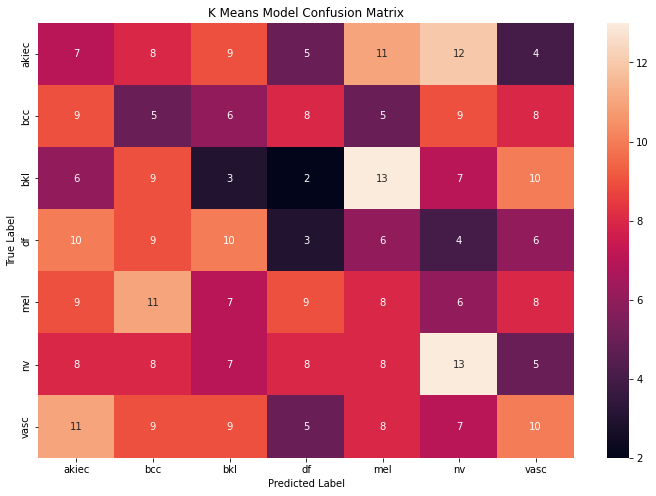

In [45]:
# Your Code Here
plot_cm("K Means", model_stats)

Looks like using the computer vision features for classification didn't work out well in this context. Why could that be? 

In [ ]:
# Your Response Here

It's important to note however, that even if a method doesn't work well with one dataset, that it may work well with another dataset.

Now, let' scombine our dataset back together so we can make some visualizations.

In [ ]:
X_sift = np.vstack((X_sift_train,X_sift_test))
y_sift = np.append(y_sift_train,y_sift_test)

Let's take a look at the t-SNE representation of our image vectors.

In [ ]:
# Your Code Here

It doesn't look like the SIFT feature method differentiated the data very well. In ML projects, you'll be faced with this a lot. You'll have to test out multiple methods to see which performs best, and not all will perform very well. However, exploring all these new techniques and cool visualizations can still be very fun!

There are also other features for which OpenCV has feature detector functions. These features include SURF, FAST, BRISK, BRIEF, and ORB. Each feature has its own unique characteristics.

In summary, our bag of words based SIFT classifier worked as follows.

![alt text](https://www.researchgate.net/publication/334093328/figure/fig3/AS:774765572796416@1561729915048/A-diagram-illustrating-how-to-generate-the-bag-of-words-visual-words-from-several.png)





# Lesion Segmentation

Now that we've used t-SNE and PCA for dimensionality reduction, let's try to see if we can segment the lesions out of the images. Why might we want to do that? Can you think of any benefits to implementing this process?

In [ ]:
# Your Response Here

If we performlesion segmentation we could prevent bias being introduced into our model based on characteristics of the background. Skin color, other moles, or hair would be prevented from having an impact in the classification.

To perform this task we'll try out multiple methods. We'll start off with basic OpenCV based thresholding, move onto clustering, and then implement complex U-net models. Let's implement otsu binarization on an image and see what the segmentation looks like.

Let's specify how many images we want to test. For these images, we'll need to maunally validate whether the lesion segmentation was accurate.

In [ ]:
IMGS_TO_CHECK = 10

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
#@title Otsu Binarization { display-mode: "form" }
def plot_thing(image_index):
  lesion_img = X_g[image_index]
  ret2,otsu_img = cv2.threshold(lesion_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  cv2_imshow(X[image_index])
  cv2_imshow(otsu_img)
interact(plot_thing, image_index=widgets.IntSlider(min=0, max= IMGS_TO_CHECK - 1, step=1))



Let's try some unsupervised methods to perform lesion segmentation. Specifically we'll attempt using two clustering algorithms. 

K means clustering and Agglomerative clustering are two forms of unsupervised learning, that generate labels to place on unlabeled data points based on their characteristics. We will be treating each pixel as a datapoint and allow the unsupervised algorithms to attempt to classify each pixel as belonging to the foreground (lesion) or background (remaining skin).

In [ ]:
print("K Means Clustering")
kmlist = []
for i in range(IMGS_TO_CHECK):
  lesion_img = X[i]

  lesion_img_flat = lesion_img.reshape(lesion_img.shape[0]*lesion_img.shape[1],lesion_img.shape[2])

  kmeans = KMeans(n_clusters=2, random_state=101)
  kmeans_labels = kmeans.fit_predict(lesion_img_flat)

  for j in range(len(kmeans_labels)):
    if kmeans_labels[j] == 1:
      kmeans_labels[j] = 255

  kmeans_lesion_img = kmeans_labels.reshape(IMG_HEIGHT,IMG_WIDTH)
  kmlist.append(kmeans_lesion_img)

def plot_thing(image_index):
  lesion_img = X_g[image_index]
  kmeans_lesion_img = kmlist[image_index]
  cv2_imshow(lesion_img)
  cv2_imshow(kmeans_lesion_img)

interact(plot_thing, image_index=widgets.IntSlider(min=0, max=IMGS_TO_CHECK - 1, step=1))

Let's take a look at the t-SNE representation of one of the images with the labeled clusters.

In [ ]:
lesion_img = X[0]
lesion_img_flat = lesion_img.reshape(lesion_img.shape[0]*lesion_img.shape[1],lesion_img.shape[2])

kmeans = KMeans(n_clusters=2, random_state=101)
kmeans_labels = kmeans.fit_predict(lesion_img_flat)

for i in range(len(kmeans_labels)):
  if kmeans_labels[i] == 1:
    kmeans_labels[i] = 255

# Your Code Here

Let's try out the same unsupervised learning method but with agglomerative clustering instead.

In [ ]:
print("Agglomerative Clustering")
aglist = []
for i in range(IMGS_TO_CHECK):
  lesion_img = X[i]

  lesion_img_flat = lesion_img.reshape(lesion_img.shape[0]*lesion_img.shape[1],lesion_img.shape[2])

  '''
  TODO: create agglomarative labels for lesion_img_flat, make sure labels are 
  either 0 or 255, make agglomarative lesion image the same shape as lesion_img,
  and append agglomerative lesion image to aglist.
  Hint: Use AgglomerativeClustering, and set the n_clusters parameter to 2
  '''

  ### YOUR CODE HERE ###

  ######################

def plot_thing(image_index):
  lesion_img = X_g[image_index]
  agglomerative_lesion_img = aglist[image_index]
  cv2_imshow(lesion_img)
  cv2_imshow(agglomerative_lesion_img)

interact(plot_thing, image_index=widgets.IntSlider(min=0, max=IMGS_TO_CHECK - 1, step=1))

Let's take a look at the t-SNE representation of one of these images as well.

In [ ]:
lesion_img = X[0]
lesion_img_flat = lesion_img.reshape(lesion_img.shape[0]*lesion_img.shape[1],lesion_img.shape[2])

agglomerative = AgglomerativeClustering(n_clusters=2)

# Your Code Here

Which method do you think performed better? Why?

In [ ]:
# Your Response Here

Seems like these unsupervised learning methods are a bit hit or miss, and can get confused easily. Let's try using Keras and CNNs to develop a lesion segmentation model. Perhaps this method will perform better.

In [ ]:
#@title Run this to download our dataset for Image Segmentation { display-mode: "form" }
os.makedirs('images_seg', exist_ok=True)
!wget -O images_seg.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/images_seg.zip'
!unzip -q images_seg.zip -d images_seg

os.makedirs('segmentation', exist_ok=True)
!wget -O segmentations.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/segmentations.zip'
!unzip -q segmentations.zip -d segmentation



In [ ]:
IMG_SEG_WIDTH = 256
IMG_SEG_HEIGHT = 192

Let's seperate our dataset into an `X` and `Y`. As we've already used those variable names, we'll define our variables as `X_seg` and `y_seg`. Remember, X represents our input data and output data. 

Unlike classification, where our input data are images, and our output data are labels, both our input and output data are images for segmentation. Specifically, our X has color images of skin lesions, while our Y has black and white "masks." These "masks" have the lesion segmented in white, while background is made the be black.

In [ ]:
#@title Run this to create our X_seg and y_seg variables

X_seg = []
y_seg = []

path, dirs, files = next(os.walk("images_seg/Images"))

path, dirs, files_seg = next(os.walk("segmentation/Segmentation"))

for i in tqdm(range(len(files))):
  file_name = files[i].split('.')[0]
  seg_index = [j for j, s in enumerate(files_seg) if file_name in s][0]

  img = cv2.imread('images_seg/Images/' + files[i],cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMG_SEG_WIDTH,IMG_SEG_HEIGHT))
  img = img/255.0
  X_seg.append(img)

  img = cv2.imread('segmentation/Segmentation/' + files_seg[seg_index],cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMG_SEG_WIDTH,IMG_SEG_HEIGHT))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = img/255.0
  y_seg.append(img)
  
X_seg = np.array(X_seg)
y_seg = np.array(y_seg)

Let's take a look at an image, and its mask.

In [ ]:
print("Original Image")
cv2_imshow(X_seg[2]*255)
print("Image Mask")
cv2_imshow(y_seg[2]*255)

Let's perform our test/train split.

In [ ]:
X_seg_train, X_seg_test, y_seg_train, y_seg_test = train_test_split(X_seg, y_seg, test_size=0.2, random_state=101)

We'll be using a model known as a U-net to perform our image segmentation. How do U-nets work? Let's take a look at the architecture. On the left hand side, you can see the image dimensions decreasing. This segment is present in the CNN we used earlier for classification as well, as a lot of the feature extraction occurs here. However with U-nets, we perform *up-convolutions* to increase our image resolution once again, to create a two-color image map. White represents our foreground while black represents our background. We connect the *contraction* segment on the left with the *expansion* segment on the right with the horizontal *bottleneck* segment. This segment selects the "important" features from the *contraction* stage so that they can be used to upscale a better high resolution image segmentation map in the *expansion* stage.

![alt text](https://miro.medium.com/max/1225/1*f7YOaE4TWubwaFF7Z1fzNw.png)



U-nets are able to able to perform segmentation well, because in practice, they are essentially classifying every image pixel to be a part of the background or foreground. For more information regarding U-nets and the model we use, check out [this](https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5) link.


Can you think of any potential shortcomings of a U-net?

In [ ]:
# Your Response Here

In [ ]:
#@title Run this code segment to define our model
def build_model():
  inputs = Input((IMG_SEG_HEIGHT, IMG_SEG_WIDTH, 3))
  s = Lambda(lambda x: x / 255) (inputs)

  conv_blocks = [16,32,64,128,256,128,64,32,16]

  conv1 = Conv2D(conv_blocks[0], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
  conv1 = Dropout(0.1) (conv1)
  conv1 = Conv2D(conv_blocks[0], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv1)
  pool1 = MaxPooling2D((2, 2)) (conv1)

  conv2 = Conv2D(conv_blocks[1], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pool1)
  conv2 = Dropout(0.1) (conv2)
  conv2 = Conv2D(conv_blocks[1], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv2)
  pool2 = MaxPooling2D((2, 2)) (conv2)

  conv3 = Conv2D(conv_blocks[2], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pool2)
  conv3 = Dropout(0.2) (conv3)
  conv3 = Conv2D(conv_blocks[2], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv3)
  pool3 = MaxPooling2D((2, 2)) (conv3)

  conv4 = Conv2D(conv_blocks[3], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pool3)
  conv4 = Dropout(0.2) (conv4)
  conv4 = Conv2D(conv_blocks[3], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
  pool4 = MaxPooling2D(pool_size=(2, 2)) (conv4)

  conv5 = Conv2D(conv_blocks[4], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pool4)
  conv5 = Dropout(0.3) (conv5)
  conv5 = Conv2D(conv_blocks[4], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv5)

  upconv6 = Conv2DTranspose(conv_blocks[5], (2, 2), strides=(2, 2), padding='same') (conv5)
  upconv6 = concatenate([upconv6, conv4])
  conv6 = Conv2D(conv_blocks[5], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upconv6)
  conv6 = Dropout(0.2) (conv6)
  conv6 = Conv2D(conv_blocks[5], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv6)

  upconv7 = Conv2DTranspose(conv_blocks[6], (2, 2), strides=(2, 2), padding='same') (conv6)
  upconv7 = concatenate([upconv7, conv3])
  conv7 = Conv2D(conv_blocks[6], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upconv7)
  conv7 = Dropout(0.2) (conv7)
  conv7 = Conv2D(conv_blocks[6], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv7)

  upconv8 = Conv2DTranspose(conv_blocks[7], (2, 2), strides=(2, 2), padding='same') (conv7)
  upconv8 = concatenate([upconv8, conv2])
  conv8 = Conv2D(conv_blocks[7], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upconv8)
  conv8 = Dropout(0.1) (conv8)
  conv8 = Conv2D(conv_blocks[7], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv8)

  upconv9 = Conv2DTranspose(conv_blocks[8], (2, 2), strides=(2, 2), padding='same') (conv8)
  upconv9 = concatenate([upconv9, conv1], axis=3)
  conv9 = Conv2D(conv_blocks[8], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upconv9)
  conv9 = Dropout(0.1) (conv9)
  conv9 = Conv2D(conv_blocks[8], (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv9)

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv9)

  model = Model(inputs=[inputs], outputs=[outputs])

  return model

The performance metric for image segmentation scenarios is IOU, or Intersection Over Union. This metric quantifies the percent overlap between the mask and our predicted output. An IOU value > 0.5 is considered to represent good performance.

![alt text](https://miro.medium.com/max/600/0*kraYHnYpoJOhaMzq.png)

How would you go about measuring our image segmentation model's performance? Could you use existing metrics you're already familiar with?

In [ ]:
# Your Response Here

As Keras doesn't have this metric, we will define a function that performs this calculation.

In [ ]:
def iou(y_true, y_pred):
     def f(y_true, y_pred):
         intersection = (y_true * y_pred).sum()
         union = y_true.sum() + y_pred.sum() - intersection
         x = (intersection + 1e-15) / (union + 1e-15)
         x = x.astype(np.float32)
         return x
     return tf.numpy_function(f, [y_true, y_pred], tf.float32)

We'll also set some hyperparameters for our model here and compile. Note: if you get lots of errors from Tensorflow, it's okay!

In [ ]:
## Hyperparameters
batch = 16
lr = 1e-4

model = build_model()

opt = tf.keras.optimizers.Adam(lr)
metrics = [iou]
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)

Let's train our model on our image segmentation data.

In [ ]:
# Your Code Here

Let's view our model's performance.

In [ ]:
y_seg_pred = model.predict(X_seg_test)
iou_val = iou(np.expand_dims(y_seg_test,axis=3),y_seg_pred)
print("IOU: " + str(iou_val.numpy()))

Let's take a look at a segmentation from the testing dataset for our U-net.

In [ ]:
image_index = 27

Original Image

In [ ]:
print("Original Image")
cv2_imshow(X_seg_test[image_index]*255)

True Segmentation

In [ ]:
print("True Segmentation")
cv2_imshow(y_seg_test[image_index]*255)

Predicted Segmentation

In [ ]:
print("Predicted Segmentation")
prediction = model.predict(X_seg_test[image_index][None,:])

# Your Code Here

Great! Looks like our U-net model is pretty decent at performing lesion segmentation. The U-net is definately better than our previous approaches for performing lesion segmentation. Can you think of any ways we could improve our U-net model? Try changing some parameters and try to see who can get the best IOU score in your group!



In [ ]:
# Your IOU Here

Try building your own U-Net model with Keras!

In [ ]:
#@title Define your U-Net Here { display-mode: "form" }
def build_model_modified():
  inputs = Input((IMG_SEG_HEIGHT, IMG_SEG_WIDTH, 3))
  s = Lambda(lambda x: x / 255) (inputs)

  # Your Code Here

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

  model = Model(inputs=[inputs], outputs=[outputs])

  return model

In [ ]:
#@title Compile and set some Hyperparameters here { display-mode: "form" }
    
## Hyperparameters
batch = 16
lr = 1e-4

model = build_model_modified()

opt = tf.keras.optimizers.Adam(lr)
metrics = [iou]
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)

In [ ]:
#@title Train Your Model Here { display-mode: "form" }
model.fit(X_seg_train.astype(np.float32), y_seg_train.astype(np.float32),
        validation_data=(X_seg_test.astype(np.float32),y_seg_test.astype(np.float32))
        ,epochs=20,verbose=1)

In [ ]:
#@title Evaluate Model Performance Here { display-mode: "form" }
y_seg_pred = model.predict(X_seg_test)
iou_val = iou(np.expand_dims(y_seg_test,axis=3),y_seg_pred)
print("IOU: " + str(iou_val.numpy()))

In [ ]:
#@title View an Individual Segmentation Here { display-mode: "form" }
image_index = 45

print("Original Image")
cv2_imshow(X_seg_test[image_index]*255)

print("True Segmentation")
cv2_imshow(y_seg_test[image_index]*255)

print("Predicted Segmentation")
prediction = model.predict(X_seg_test[image_index][None,:])

prediction_img = np.reshape(prediction.flatten(),(IMG_SEG_HEIGHT, IMG_SEG_WIDTH))
retval, threshold = cv2.threshold(prediction_img, 0.5, 255, cv2.THRESH_BINARY)

cv2_imshow(threshold*255)

In this notebook, we explored multiple dimensionality reduction techniques to better understand our dataset. This can helps in determining what steps to take when developing and tweaking additional ML models.

Our work with SIFT feature based classification and U-net image segmentation is also very helpful. We could continue tweaking  our SIFT feature based classification model to eventually integrate it as part of an ensemble classification system! This would mean that the SIFT based classification model would be one of many different types of ML models being sampled during classification. This ensemble system could have greater skin cancer classification performance, and some of our next steps could be to integrate this into our web app! We could also integrate our U-net image segmentation model as a part of the skin cancer diagnosis pipline in our web app, by first performing image segmentation on the users device, prior to the actual classification by our CNN.

# Next Steps

Great work! You've completed the Skin Cancer Diagnosis project! Just as in a real ML project, we explored a variety of ML methods and saw that some worked well while others didn't do so well. However, its important that you get a chance to work with them, so in future projects, you're well equipped to explore different methodologies. 

From here, you can go on to explore other image datasets, and start developing more advanced ML models for healthcare!

Good Luck!
